In [21]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\alexlim\Desktop\workspace\python\house-price-prediction\kc_house_data.csv')

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
""" 
Drop some of the dataframe column attributes that we will not focus on.
Some square feet features are removed because some of them are 
redundant and may affect the house prediction. For this prediction model,
only want to focus on the square feet of the above area, square feet of 
the basement, and square feet of the lot. 
"""

# drop dataframe attributes that won't be used
df = df.drop(columns=['id', 'waterfront', 'view', 'sqft_living', 'sqft_living15', 'sqft_lot15'])


In [7]:
"""
This section modifies the dataframe so that the 'date' column is 
a recognizable binary value (instead of 2014 or 2015), which will
have less of a major impact on the training.

Also, the yr_renovated column was renamed to renovated, a binary
representation (1 = has been renovated; 0 = never renovated).
"""

year_date = [x[0:4] for x in df.date]                           # modify dataframe for dates to only be year 
year_date = [int(i) for i in year_date]                         # convert to int
cnt1 = Counter(year_date)                                       # counter to check how many houses sold in 2014 and 2015
print(cnt1)                                                     # print the count
binary_date = [1 if year == 2015 else 0 for year in year_date]  # change to binary (0 for 2014 and 1 for 2015)
df['date'] = binary_date                                        # update date column

df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)   # change column name
binary_ren = [0 if ren == 0 else 1 for ren in df.renovated]      # modify renovated to binary
cnt2 = Counter(binary_ren)
print(cnt2)
df['renovated'] = binary_ren                                     # update renovated column

df.head()       # observe new dataframe head


Counter({2014: 14633, 2015: 6980})
Counter({0: 20699, 1: 914})


,date,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,renovated,zipcode,lat,long
0,0,221900.0,3,1.00,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,0,538000.0,3,2.25,7242,2.0,3,7,2170,400,1951,1,98125,47.7210,-122.319
2,1,180000.0,2,1.00,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,0,604000.0,4,3.00,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1,510000.0,3,2.00,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [8]:
"""
Build a correlation matrix to get a feel for the correlation between house prices (target
feature) and the other features of the dataframe.

It is observed that correlations close to 0 have very little effect on the price of the
houses. Correlations closer to +1 or -1 have a larger effect on the price of the houses.
"""

corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
grade            0.667463
sqft_above       0.605566
bathrooms        0.525134
sqft_basement    0.323837
bedrooms         0.308338
lat              0.306919
floors           0.256786
renovated        0.126101
sqft_lot         0.089655
yr_built         0.053982
condition        0.036392
long             0.021571
date             0.003554
zipcode         -0.053168
Name: price, dtype: float64

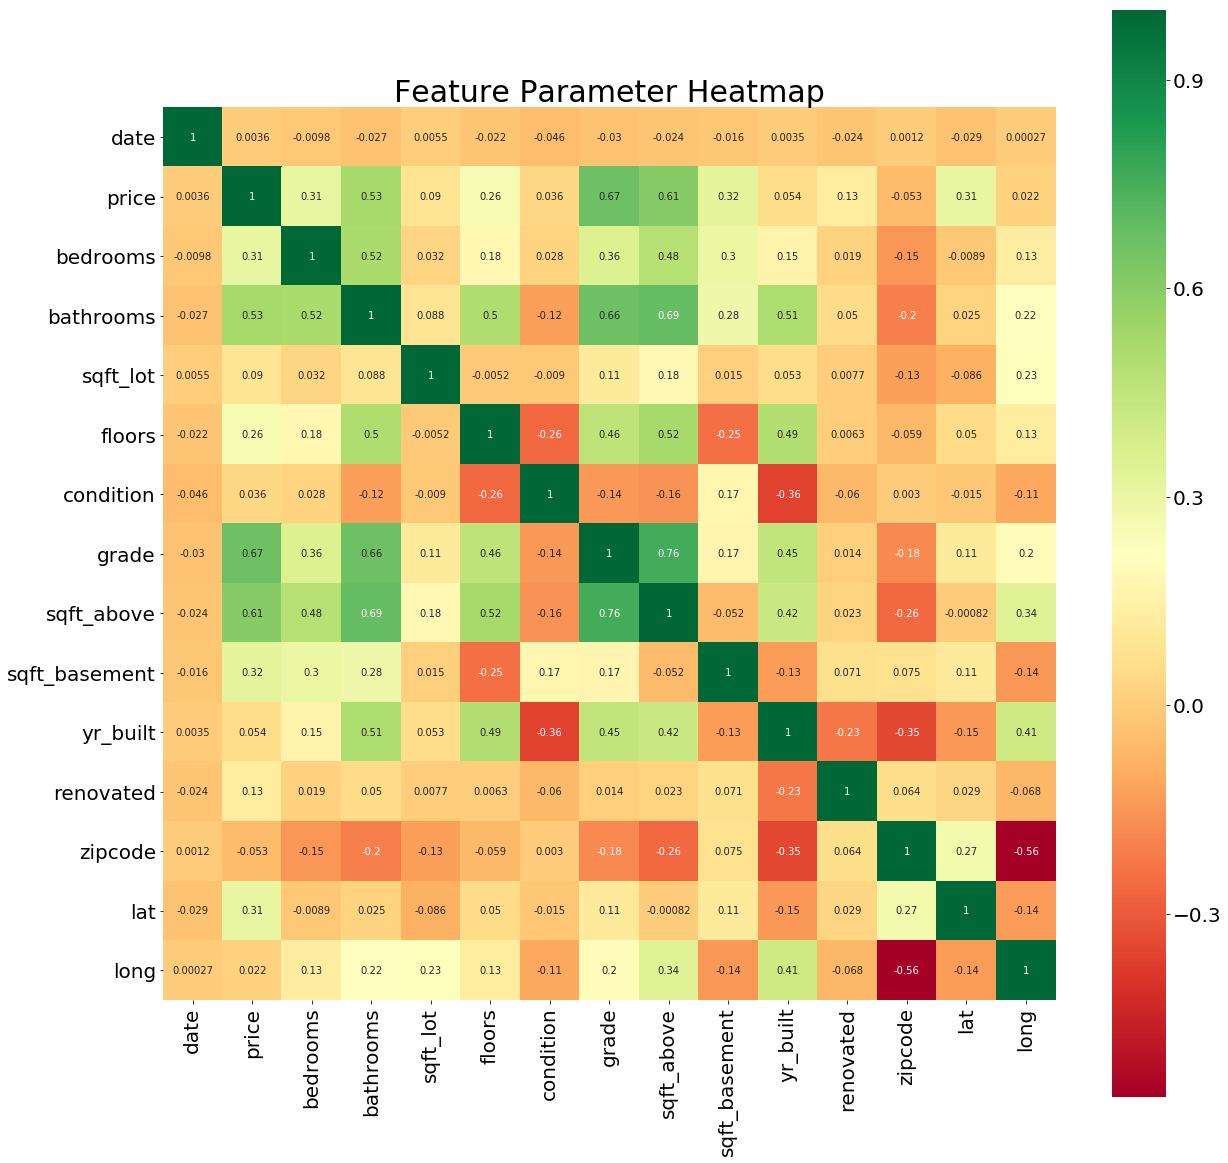

In [10]:
sns.heatmap(df.corr(), square=True, annot=True, cmap='RdYlGn') # creates a heatmap object
plt.rcParams['figure.figsize'] = (20, 20)                           # changes plot size 
plt.rc('xtick', labelsize=20)                                       # changes x-label size
plt.rc('ytick', labelsize=20)                                       # changes y-label size
plt.rc('axes', titlesize=30)                                        # change title size
plt.title('Feature Parameter Heatmap')                              # title
plt.show()                                                          # show the plot

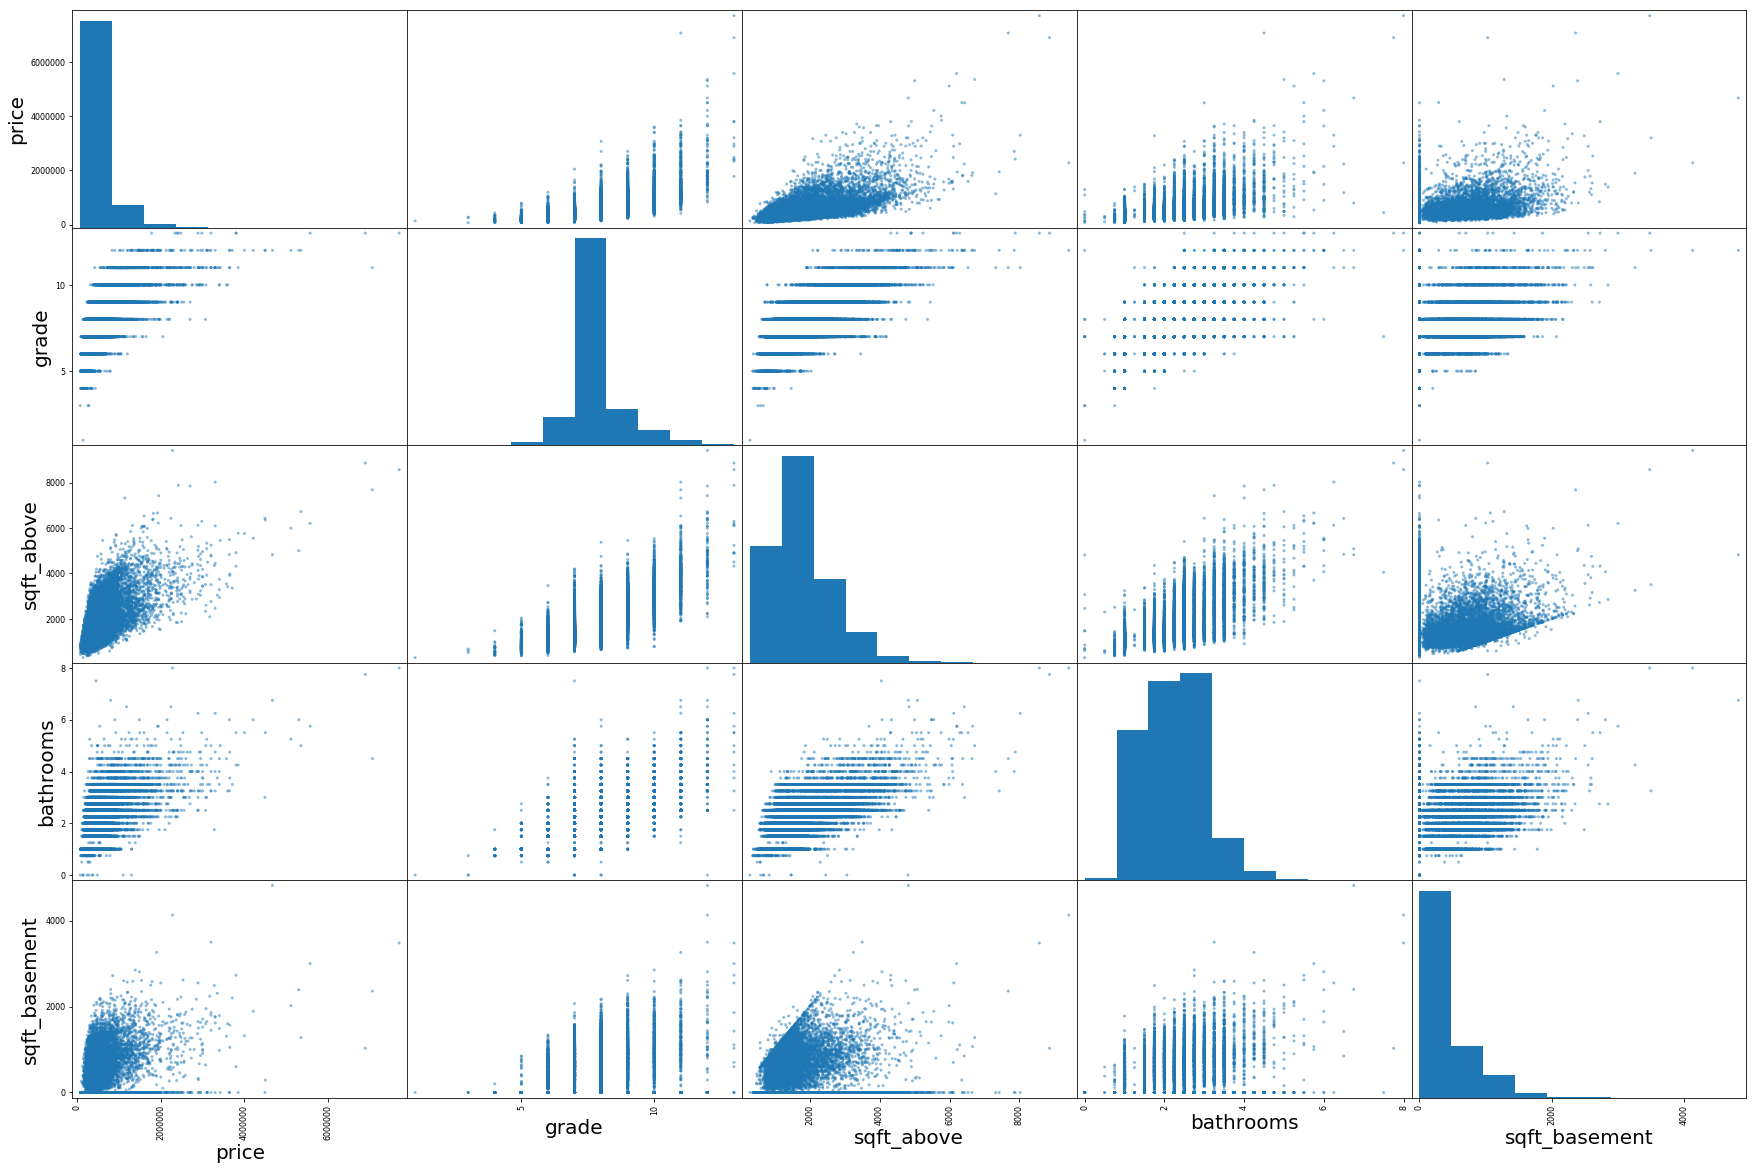

In [11]:
""" 
Construct a pandas scatter matrix to observe the four most correlated variables with 
the house price.
"""
attributes = ['price', 'grade', 'sqft_above', 'bathrooms', 'sqft_basement']
scatter_matrix = scatter_matrix(df[attributes], figsize=(30, 20))
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.savefig('matrix.png')

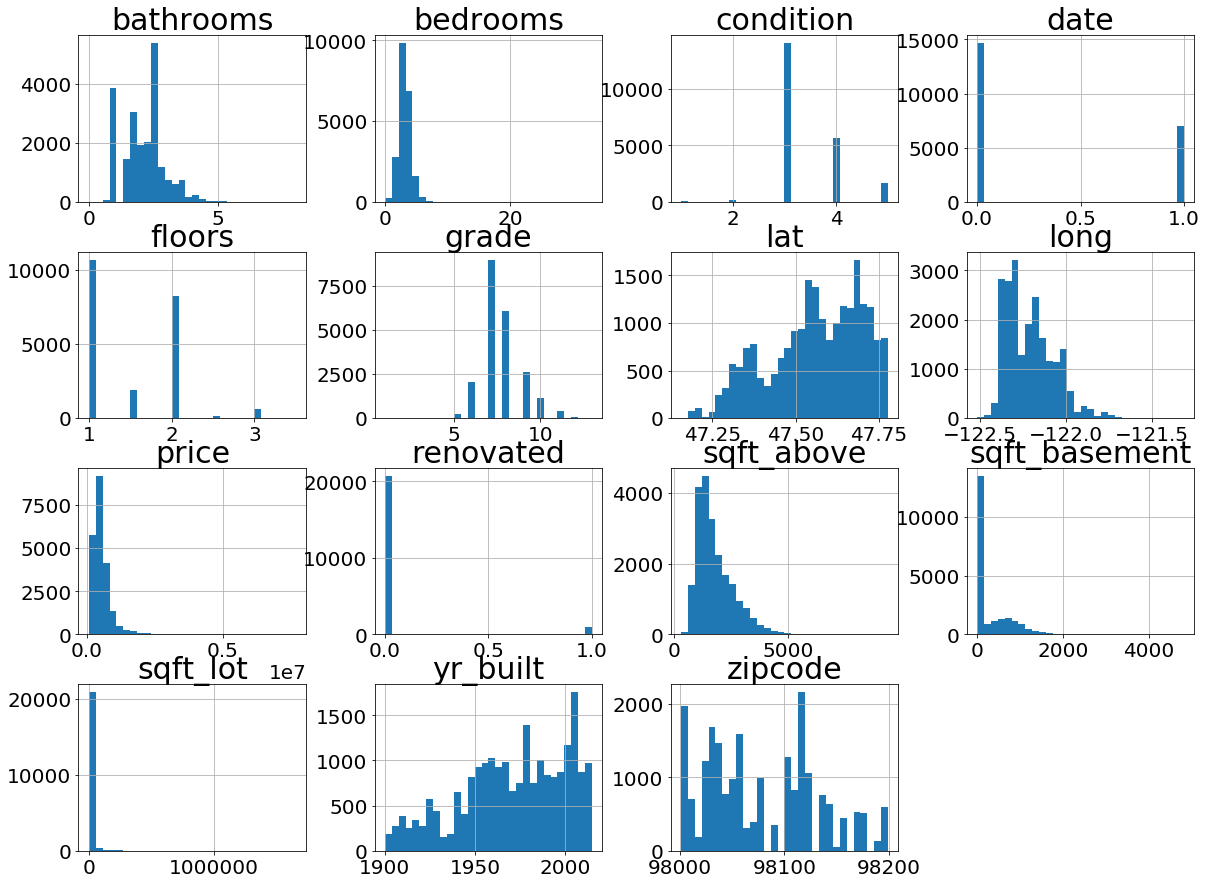

In [12]:
"""
Construct histograms of the observed features in order to visualize how the data is spread.
"""
df.hist(bins=30, figsize=(20, 15))
plt.savefig("Histographs of Dataframe")
plt.show()

Counter({3: 9824, 4: 6882, 2: 2760, 5: 1601, 6: 272, 1: 199, 7: 38, 0: 13, 8: 13, 9: 6, 10: 3, 11: 1, 33: 1})


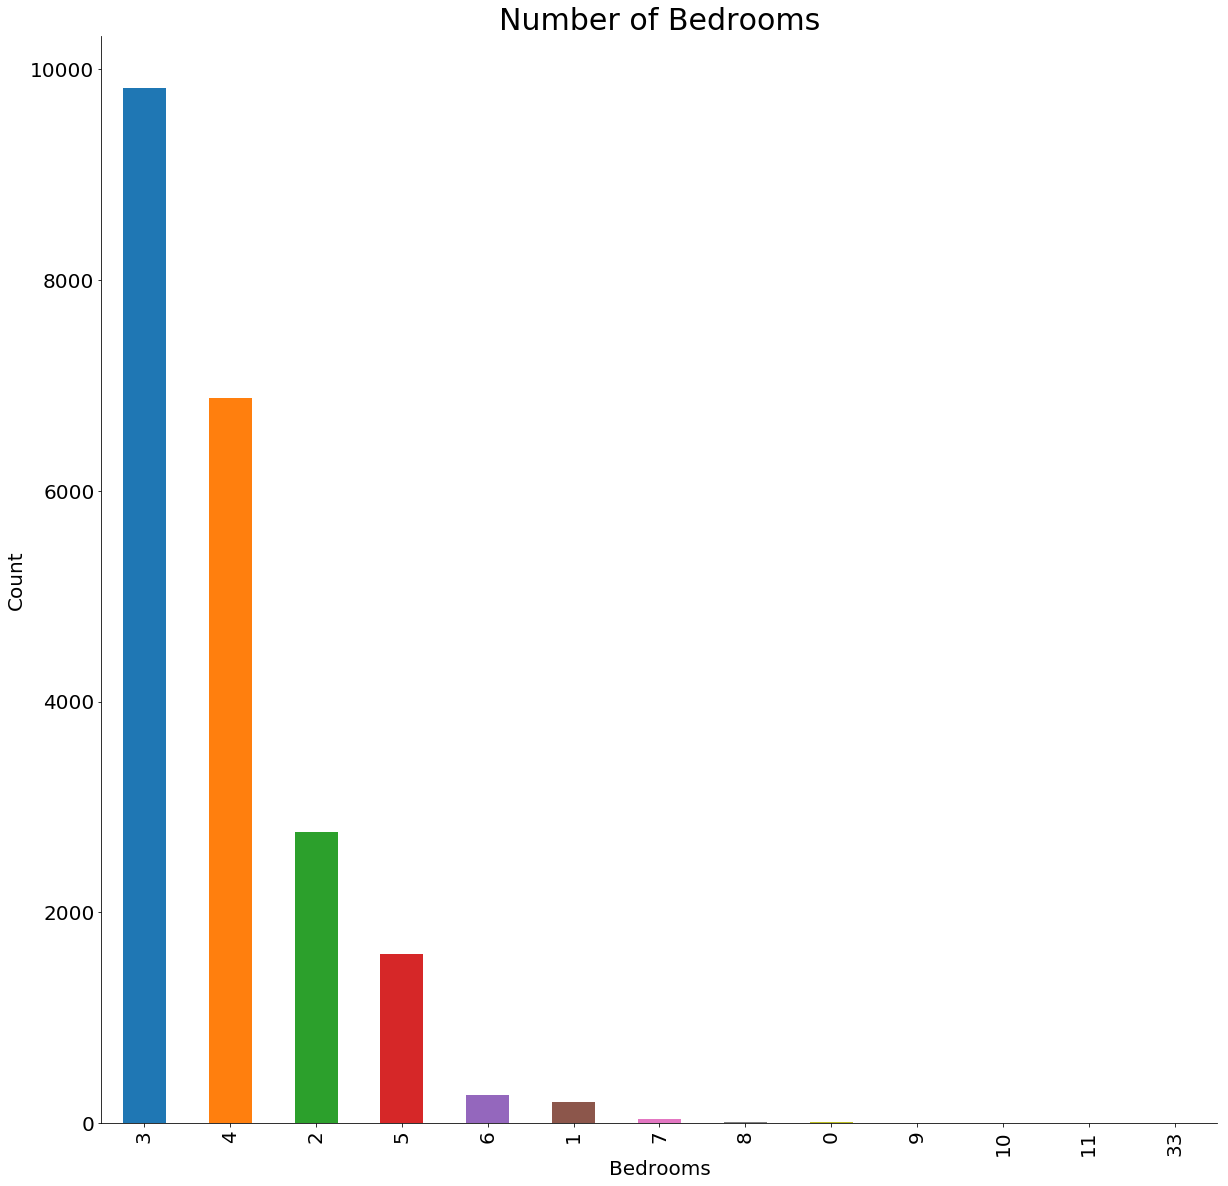

In [14]:
"""
Construct single bar graphs for areas of interest: bedrooms
"""
df['bedrooms'].value_counts().plot(kind='bar', figsize=(20, 20), fontsize=20)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms', fontsize=20)
plt.ylabel('Count', fontsize=20)
bed_count = Counter(df['bedrooms'])
print(bed_count)
sns.despine()

Counter({2.5: 5380, 1.0: 3852, 1.75: 3048, 2.25: 2047, 2.0: 1930, 1.5: 1446, 2.75: 1185, 3.0: 753, 3.5: 731, 3.25: 589, 3.75: 155, 4.0: 136, 4.5: 100, 4.25: 79, 0.75: 72, 4.75: 23, 5.0: 21, 5.25: 13, 0.0: 10, 5.5: 10, 1.25: 9, 6.0: 6, 0.5: 4, 5.75: 4, 6.75: 2, 8.0: 2, 6.25: 2, 6.5: 2, 7.5: 1, 7.75: 1})


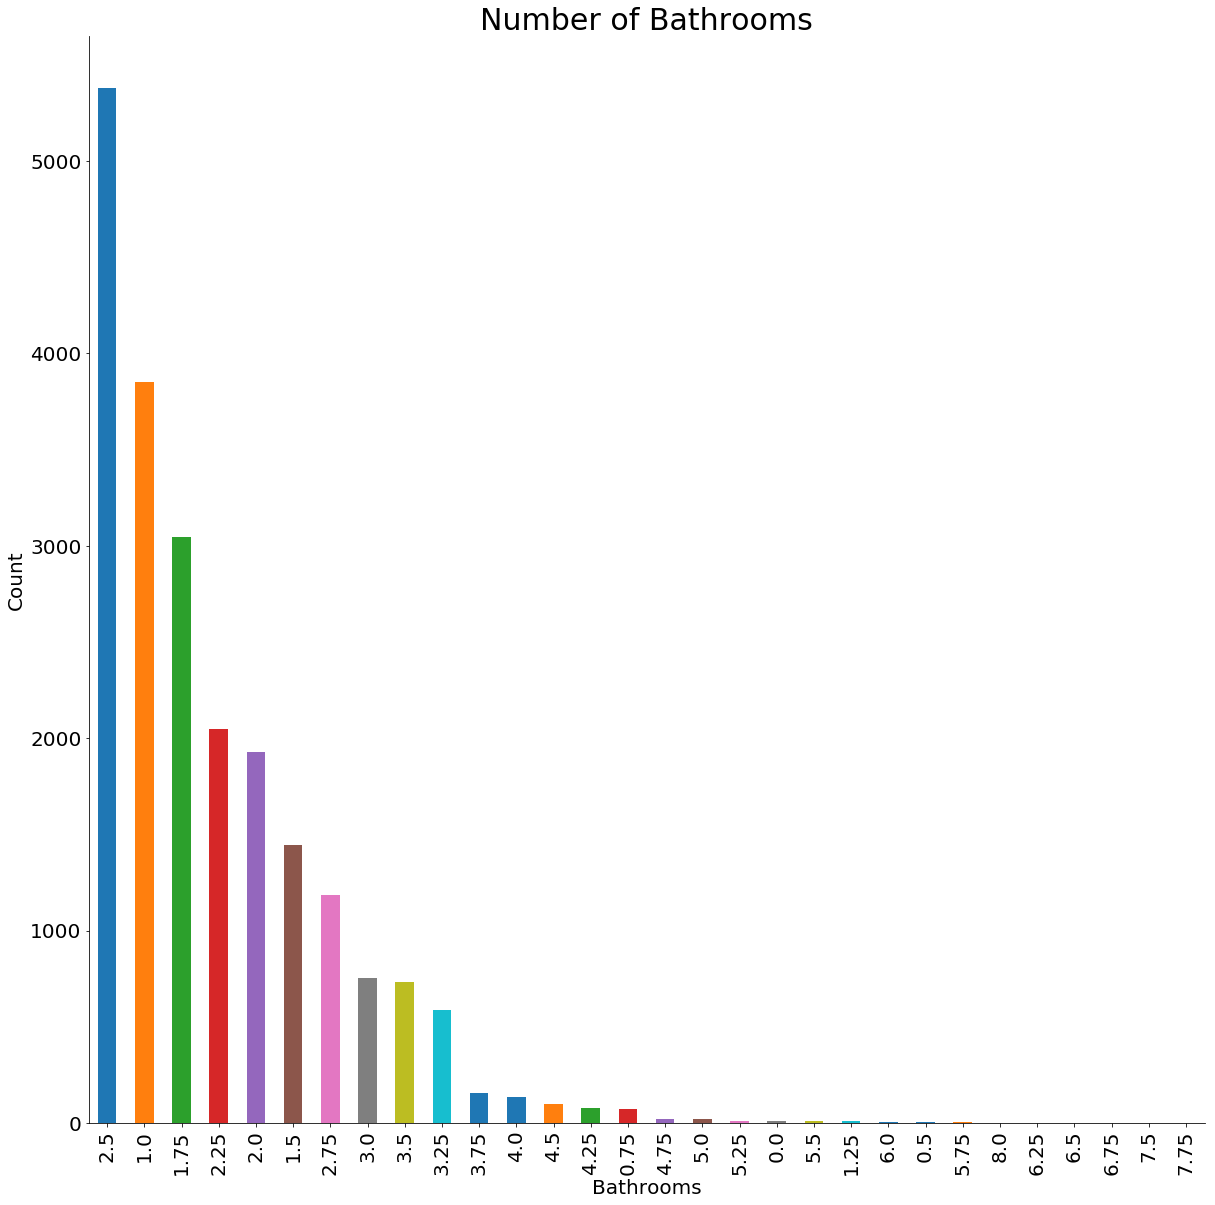

In [15]:
"""
Construct single bar graphs for areas of interest: Bathrooms
"""
df['bathrooms'].value_counts().plot(kind='bar', figsize=(20, 20), fontsize=20)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms', fontsize=20)
plt.ylabel('Count', fontsize=20)
bed_count = Counter(df['bathrooms'])
print(bed_count)
sns.despine()


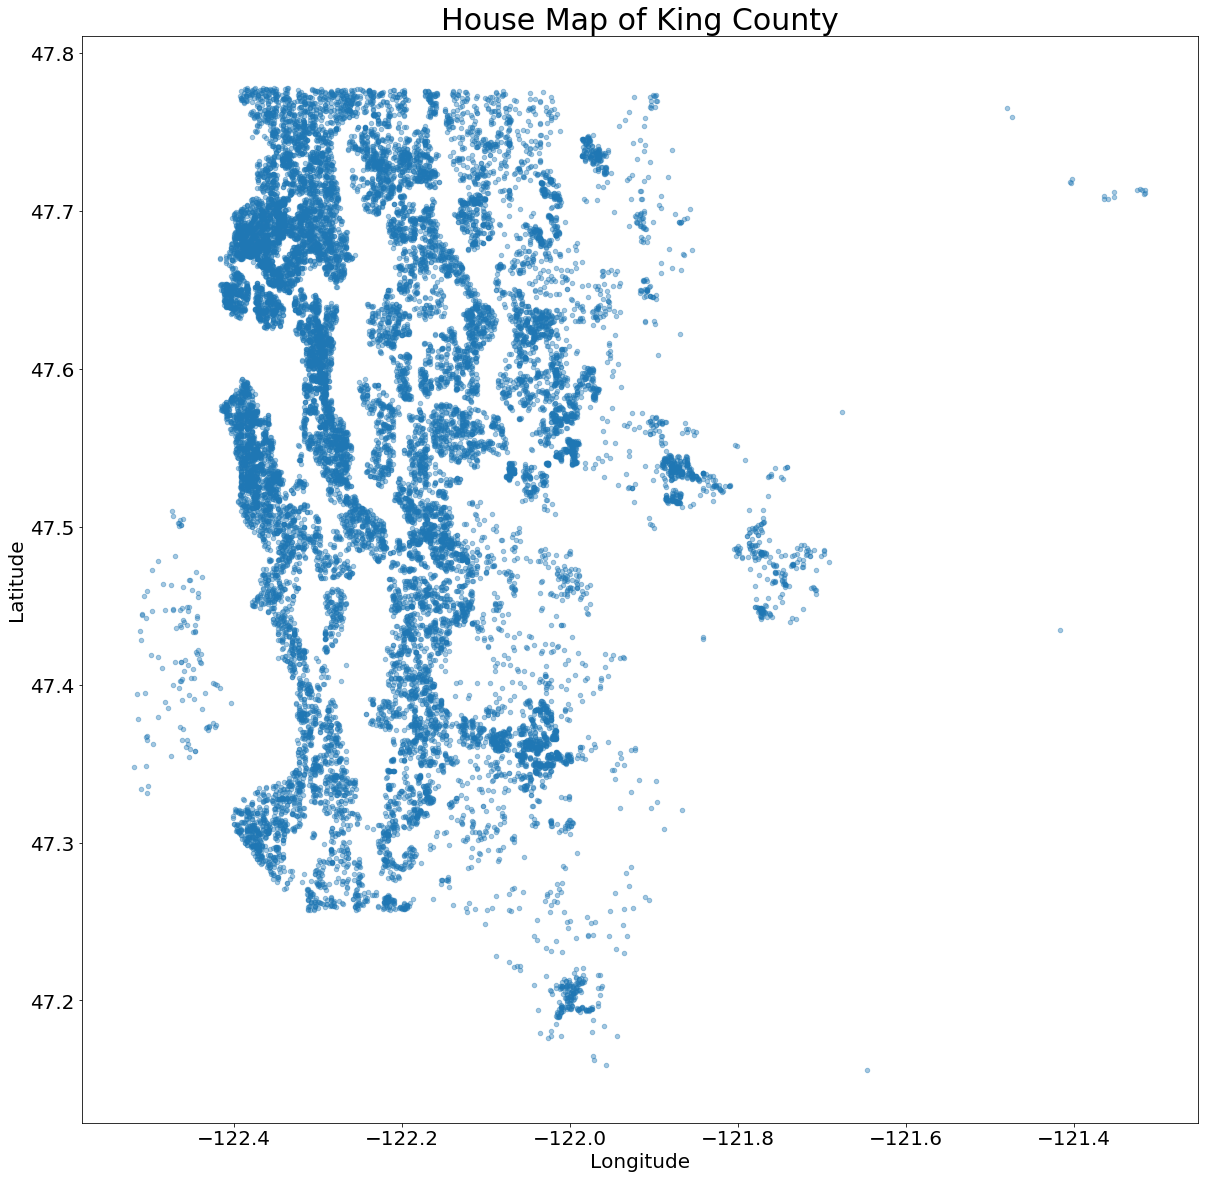

In [16]:
"""
Visualize the house map based on longitude and latitude on a scatter plot.
"""

df.plot(kind='scatter', x='long', y='lat', alpha=0.4, figsize=(20, 20), fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('House Map of King County')
plt.savefig('map1.png')


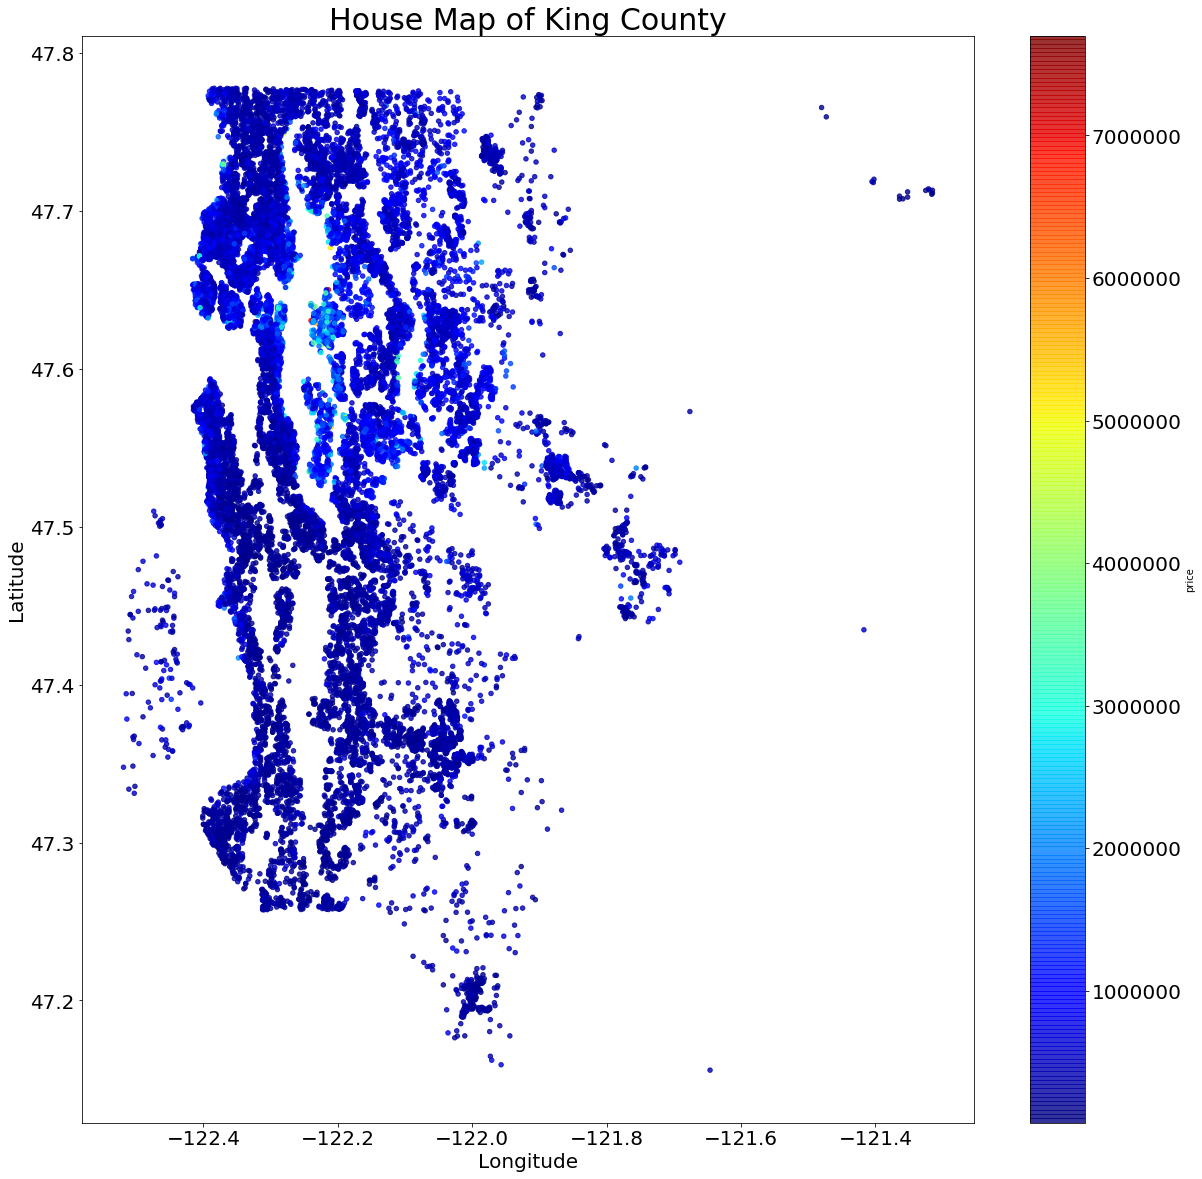

In [17]:
"""
Let's color code the scatter plot according to house prices.
c: color
cmap: colormap specification (colors representation)
colorbar: True = show colorbar
sharex: False = don't share x axis

We can observe that the more expensive houses are relatively towards the north/middle area.
"""

df.plot(kind="scatter", x="long", y="lat", alpha=0.8, figsize=(20, 20), fontsize=20, c="price", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('House Map of King County')
plt.savefig('map2.png')

In [22]:
"""
This section defines our training features that are used for the regression model to 
predict the target feature (price). 

sklearn's train_test_split model is used to allocate 10% of the dataset for testing with the model 
based off the training data.
"""
# define input and output features
target_feature = df['price']                             # set price as target feature for prediction
train_features = df.drop(columns=['price'])              # define training features as all features except target 'price'

# split the training and test data (20% or 1/5 data for testing) at random seed 25
X_train, X_test, y_train, y_test = train_test_split(train_features, target_feature, test_size=0.2, random_state=25)

In [23]:
"""
This section deals with training the model for prediction. 
"""

# instantiate a linear regression regressor
reg = LinearRegression()

# fit the regressor to the training data
reg.fit(X_train, y_train)

# predict on the test data
y_pred = reg.predict(X_test)

print(y_pred)

[811404.75547427 702998.25505578 147221.02197273 ... 605233.89510378
 735844.16735819 510513.71672765]


In [24]:
"""
Print errors.

R-squared error explains the percentage of variability in Y that can be explained using X. 
The root-mean-squared-error (RMSE) states that the model was able to predict the value of 
every house in the test set within the RMSE value ($222,870 of the real price).
"""

# R-Squared Error
print('R Squared Error: {}'.format(reg.score(X_test, y_test)))

# Room-Mean-Squared-Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

# Mean Absolute Error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_pred, y_test)))


R Squared Error: 0.652909500901139
Root Mean Squared Error: 222870.93541887763
Mean Absolute Error: 137434.32524820964


In [27]:
"""
Use cross-validation and see if it yields better results than simply separating the data.
80% for training and 20% for testing. 
"""

from sklearn.model_selection import cross_val_score

reg = LinearRegression()

# use 5-fold CV on the training data
cv_scores = cross_val_score(reg, train_features, target_feature, cv=5)

print(cv_scores)
print('Average 5-Fold CV Scores: {}'.format(np.mean(cv_scores)))

[0.64039518 0.65651235 0.65971316 0.6719087  0.66334899]
Average 5-Fold CV Scores: 0.6583756767640246


In [28]:
"""
Use gradient boosting to improve model accuracy. Observe better error results.
"""

# model = GradientBoostingRegressor().fit(X_train, y_train)
model = ensemble.GradientBoostingRegressor(n_estimators=1000, max_depth=5, min_samples_split=2,
                                           learning_rate=0.1, loss='ls')
model.fit(X_train, y_train)

print('Gradient Boosting R Squared Error: {}'.format(model.score(X_test, y_test)))

y_pred_gb = model.predict(X_test)
model_mse_gb = mean_squared_error(y_pred_gb, y_test)
model_rmse_gb = np.sqrt(model_mse_gb)
print('Root Mean Squared Error: {}'.format(model_rmse_gb))

Gradient Boosting R Squared Error: 0.842499154252757
Root Mean Squared Error: 150132.08568878268


In [ ]:
"""
Check out the feature importance of each feature in determining house prices.
"""

# Numpy array of the feature labels for predicting house prices
feature_labels = np.array(['grade', 'sqft_above', 'bathrooms', 'sqft_basement', 'bedrooms', 'lat', 
                           'floors', 'renovated', 'sqft_lot', 'yr_built', 'condition', 'long', 'date', 
                           'zipcode'])

importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))